In [1]:
import numpy as np

from scipy.stats import gmean,hmean, beta

from plotly.offline import iplot
import plotly.graph_objects as go

def rms(x):
    return np.sqrt(np.mean(x**2))


# Fixed distance example

In [9]:
n = 30
mu= 100
sigma=30

t_i = sigma * np.random.randn(n) + mu
x_i = 1000*np.ones(n)
v_i = x_i/t_i

harmonic_mean_v = hmean(v_i)
arithmetic_mean_v = np.mean(v_i)
geometric_mean_v = gmean(v_i)

x_predicted_harmonic = harmonic_mean_v*t_i
x_predicted_geometric = geometric_mean_v*t_i
x_predicted_arithmetic  = arithmetic_mean_v*t_i

In [10]:
(harmonic_mean_v*t_i).sum(),(arithmetic_mean_v*t_i).sum() , (geometric_mean_v*t_i).sum() ,x_i.sum()

(30000.000000000004, 36788.09755948407, 32809.081033467606, 30000.0)

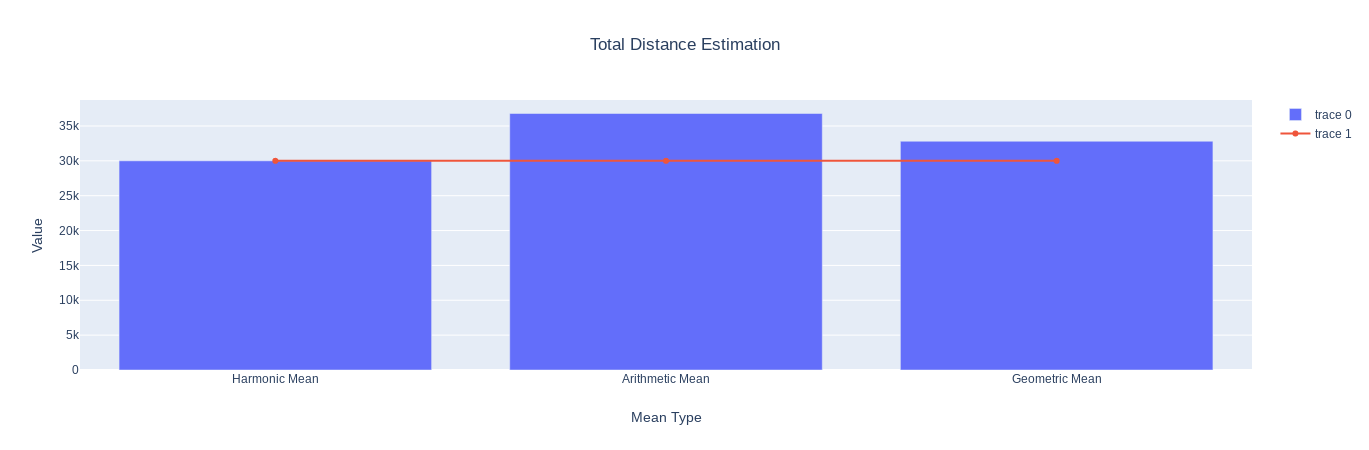

In [14]:
x_axis = ['Harmonic Mean','Arithmetic Mean','Geometric Mean']

layout = go.Layout(title={'text':'Total Distance Estimation (fixed distance)','x':0.5},xaxis_title='Mean Type', yaxis_title='Value')

iplot(go.Figure(data=[go.Bar(x=x_axis,y=[(harmonic_mean_v*t_i).sum(),(arithmetic_mean_v*t_i).sum() , (geometric_mean_v*t_i).sum()]),
                      go.Scatter(x=x_axis,y=[x_i.sum()]*3)],
               layout=layout))

# Fixed time example

In [15]:
n = 30
mu= 100
sigma=30

x_i = sigma * np.random.randn(n) + mu
t_i = 10*np.ones(n)
v_i = x_i/t_i

harmonic_mean_v = hmean(v_i)
arithmetic_mean_v = np.mean(v_i)
geometric_mean_v = gmean(v_i)

x_predicted_harmonic = harmonic_mean_v*t_i
x_predicted_geometric = geometric_mean_v*t_i
x_predicted_arithmetic  = arithmetic_mean_v*t_i

In [16]:
(harmonic_mean_v*t_i).sum(),(arithmetic_mean_v*t_i).sum() , (geometric_mean_v*t_i).sum() ,x_i.sum()

(2509.0553426275405, 2851.74882740553, 2701.185485887288, 2851.7488274055304)

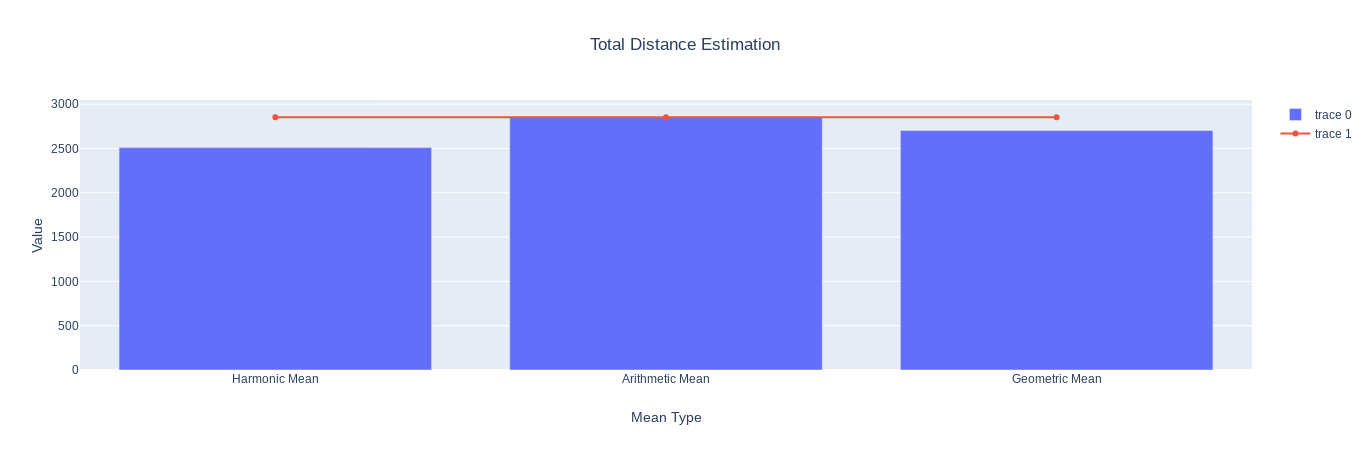

In [17]:
x_axis = ['Harmonic Mean','Arithmetic Mean','Geometric Mean']

layout = go.Layout(title={'text':'Total Distance Estimation (fixed time)','x':0.5},xaxis_title='Mean Type', yaxis_title='Value')

iplot(go.Figure(data=[go.Bar(x=x_axis,y=[(harmonic_mean_v*t_i).sum(),(arithmetic_mean_v*t_i).sum() , (geometric_mean_v*t_i).sum()]),
                      go.Scatter(x=x_axis,y=[x_i.sum()]*3)],
               layout=layout))

# Population example

In [19]:
horizon = 150
mu=1.1
sigma=0.2
alpha_t = sigma * np.random.randn(horizon) + mu

geometric_mean_alpha = gmean(alpha_t)
arithmetic_mean_alpha = np.mean(alpha_t)
harmonic_mean_alpha = hmean(alpha_t)

In [20]:
geometric_mean_alpha, arithmetic_mean_alpha, harmonic_mean_alpha

(1.094379202155317, 1.1125759008913565, 1.07536287649867)

In [21]:
initial_population = 10
population =  initial_population*np.cumproduct(np.concatenate((np.array([1]),alpha_t)))
estimated_population_geometric = initial_population*np.geomspace(1, geometric_mean_alpha**horizon, num=horizon+1)
estimated_population_arithmetic = initial_population*np.geomspace(1, arithmetic_mean_alpha**horizon, num=horizon+1)
estimated_population_harmonic = initial_population*np.geomspace(1, harmonic_mean_alpha**horizon, num=horizon+1)

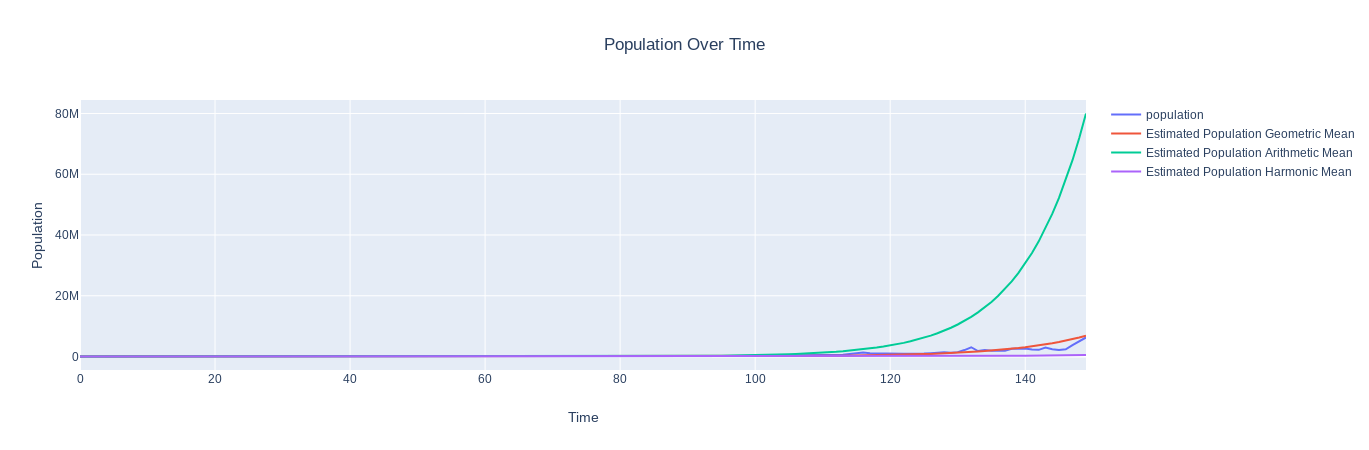

In [22]:
layout = go.Layout(title={'text':'Population Over Time','x':0.5},xaxis_title='Time', yaxis_title='Population')

iplot(go.Figure(data=[go.Scatter(x=list(range(horizon)),y=population,name='population'),
                     go.Scatter(x=list(range(horizon)),y=estimated_population_geometric,name='Estimated Population Geometric Mean'),
                     go.Scatter(x=list(range(horizon)),y=estimated_population_arithmetic,name='Estimated Population Arithmetic Mean'),
                      go.Scatter(x=list(range(horizon)),y=estimated_population_harmonic,name='Estimated Population Harmonic Mean')],
               layout=layout))